# Assignment: Data Wrangling

In [2]:
! git clone https://github.com/adaire2/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 63 (delta 21), reused 26 (delta 8), pack-reused 21
Receiving objects: 100% (63/63), 6.76 MiB | 6.97 MiB/s, done.
Resolving deltas: 100% (23/23), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [47]:
import pandas as pd
airbnb = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory = False)
airbnb = airbnb.sort_values('Price', ascending = True)
airbnb.head()
#first, I just wanted to get an idea of the price variable

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
16782,10317189,11/28/2013,UWS MANHATTAN APT FOR SUPERBOWL WE,Manhattan,Apartment,NaN,Entire home/apt,10025.0,2.0,1,0,"1,000",NaN
16826,10367443,12/1/2013,Heart of Soho,Manhattan,Apartment,85.0,Entire home/apt,10012.0,2.0,1,3,"1,000",87.0
17851,11540028,1/22/2014,Spacious 2 BR in North Chelsea,Manhattan,Apartment,NaN,Entire home/apt,10001.0,2.0,1,0,"1,000",NaN
8702,3323488,8/20/2012,Photoshoot/Video- Historic Townhome,Brooklyn,House,NaN,Entire home/apt,11216.0,3.0,1,0,"1,000",NaN
25144,25067295,12/21/2014,East Village / Gramercy Park 2 BR,Manhattan,Apartment,NaN,Entire home/apt,10003.0,2.0,1,0,"1,000",NaN


In [52]:
airbnb['Price'].describe()

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object

In [53]:
airbnb['Price'].isnull().sum()
#I wanted to make sure none of the values are null, and they are all not null!

0

In [56]:
airbnb['Price'] = airbnb['Price'].str.replace(',', '')
airbnb.head()
#I removed the commas from prices (which really only impacts the values over 999)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
16782,10317189,11/28/2013,UWS MANHATTAN APT FOR SUPERBOWL WE,Manhattan,Apartment,NaN,Entire home/apt,10025.0,2.0,1,0,1000,NaN
16826,10367443,12/1/2013,Heart of Soho,Manhattan,Apartment,85.0,Entire home/apt,10012.0,2.0,1,3,1000,87.0
17851,11540028,1/22/2014,Spacious 2 BR in North Chelsea,Manhattan,Apartment,NaN,Entire home/apt,10001.0,2.0,1,0,1000,NaN
8702,3323488,8/20/2012,Photoshoot/Video- Historic Townhome,Brooklyn,House,NaN,Entire home/apt,11216.0,3.0,1,0,1000,NaN
25144,25067295,12/21/2014,East Village / Gramercy Park 2 BR,Manhattan,Apartment,NaN,Entire home/apt,10003.0,2.0,1,0,1000,NaN


In [57]:
print(airbnb['Price'].describe()) # at this point we can tell that the datatype is an object (which it is because there were commas), int may be better

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object


In [64]:
airbnb['Price'] = airbnb['Price'].astype('int64') #put it into a integer!
print(airbnb['Price'].describe(),'\n') #check that we did make it into an integer (also look at max and min)
#max and min are a little suspicious, especiall the 10,000 number which seems like an outlier
airbnb['Price'].mean() #mostly just curious

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

10 

10000 



163.58973685937397

<Axes: >

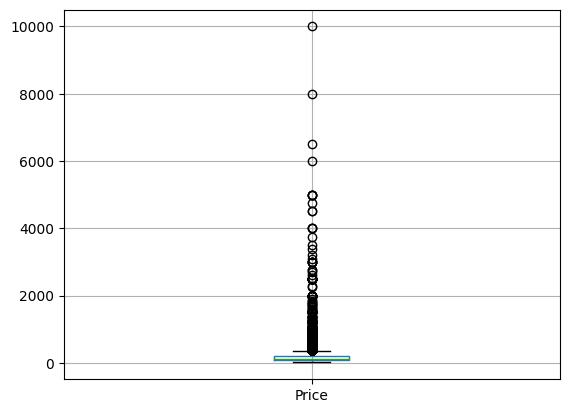

In [69]:
#airbnb['Price'].boxplot()
airbnb.boxplot('Price')

Axes(0.125,0.11;0.775x0.77)


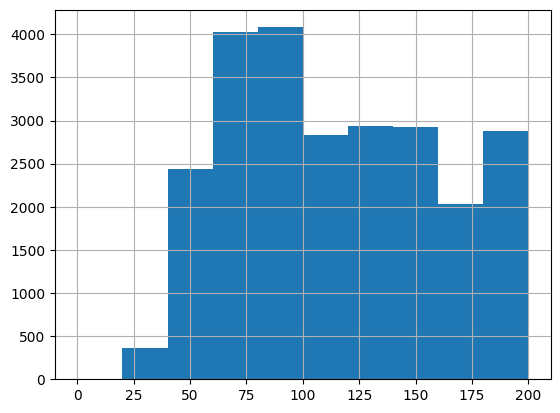

In [76]:
print(airbnb['Price'].hist(range = [0,200]))

Axes(0.125,0.11;0.775x0.77)


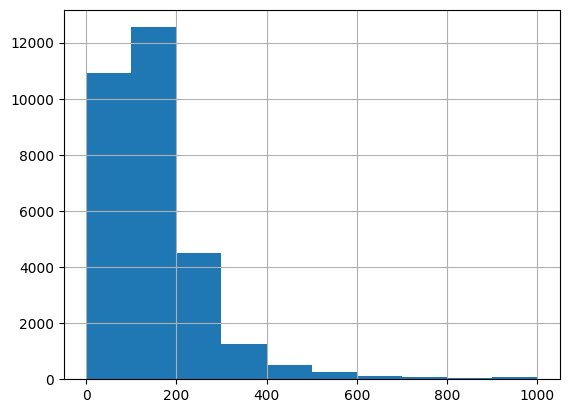

In [77]:
print(airbnb['Price'].hist(range = [0,1000]))

Axes(0.125,0.11;0.775x0.77)


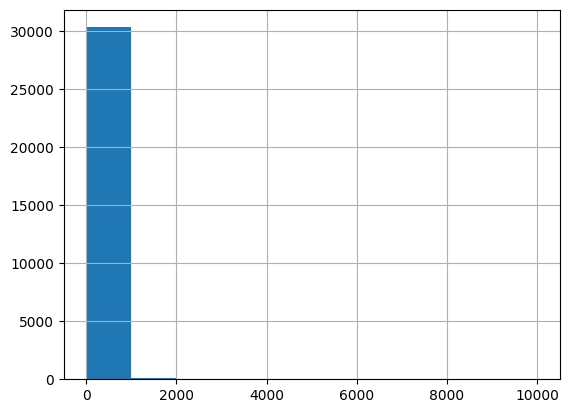

In [78]:
print(airbnb['Price'].hist(range = [0,10000]))

I'm a little skeptical about some of the really expensive and really cheap data, but maybe some people are really buying $10,000/night airbnbs

In [85]:
sharks = pd.read_csv('/content/wrangling/assignment/data/sharks.csv', low_memory = False)
sharks.head() #look at the data/get an idea of where things are
print(sharks.shape)
sharks['Type'].describe() #look at the 'Type' column specifically


(6462, 257)


count           6457
unique            12
top       Unprovoked
freq            4716
Name: Type, dtype: object

In [27]:
print(sharks.columns.to_list()) #look at all of the columns

['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Unnamed: 9', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69', 'Unna

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



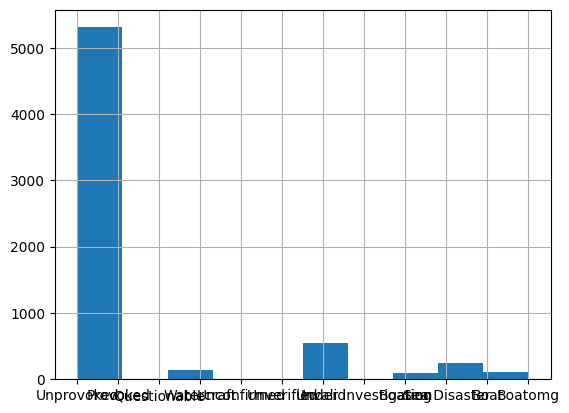

In [86]:
print(sharks['Type'].unique(), '\n') #look at all of the different types of attacks -- we can see that there is one with a type 'Boatomg' which is proabably boating
print(sharks['Type'].value_counts(), '\n') #see all of the counts/type, seems like we could consolidate some (eg. boat, boating, boatomg, and watercraft)
print(sharks['Type'].hist(), '\n') #look at the data via plot (ugly histogram, fix with ...)


In [88]:
sharks['Type'] = sharks['Type'].str.replace('Boatomg', 'Boating') #fix the typo
sharks['Type'] = sharks['Type'].str.replace('Boating', 'Boat') #these are the same too
sharks['Type'] = sharks['Type'].str.replace('Boat', 'Boating') # i prefer boating, but if it did it the other way around i would have 'boatining'
print(sharks['Type'].unique())

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan]


In [89]:
sharks['Type'] = sharks['Type'].str.replace('Unverified', 'Unconfirmed') #combine these as one
print(sharks['Type'].unique())

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan]


In [35]:
trial = pd.read_csv('/content/wrangling/data/VirginiaPretrialData2017Codebook.pdf')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 11: invalid start byte

**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?